written by Charlie Moffett CUSP 2017

__Assignment 3: investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP__

Following instructions in this skeleton notebook: https://github.com/fedhere/PUI2017_fb55/blob/master/HW5_fb55/Assignment3_instructionsUpdated.ipynb

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
puidata = os.getenv('PUIDATA')
puidata

'/home/cusp/cm4698/PUIdata'

## Part A: Merge all datasets

__World firearms murders and ownership__

In [39]:
# Importing gSheet data
df1 = pd.read_csv(puidata + '/' + 'World firearms murders and ownership - Sheet 1.csv')
df1.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [40]:
# We only want Country/Territory, Average total all civilian firearms, and Number of homicides by firearm
# Axis is 1 because we're dropping columns, and inplace is true because we want to overwrite the dataframe
df1.drop(['ISO code', 'Source', '% of homicides by firearm', 'Homicide by firearm rate per 100,000 pop', 
        'Rank by rate of ownership', 'Average firearms per 100 people'], axis=1, inplace=True)
df1 = df1.rename(columns={'Country/Territory' : 'Country'})
df1.head()

,Country,Number of homicides by firearm,Average total all civilian firearms
0,Albania,56.0,270000.0
1,Algeria,20.0,1900000.0
2,Angola,NaN,2800000.0
3,Anguilla,1.0,NaN
4,Argentina,1198.0,3950000.0


__World Population__

In [27]:
# Importing csv for World Data
df2 = pd.read_csv(puidata + '/' + 'API_SP.POP.TOTL_DS2_en_csv_v2.csv', skiprows=[0,1,2,3], header=None)
new_header = df2.iloc[0]
df2 = df2[1:] 
df2.columns = new_header
df2.drop(['Country Code', 'Indicator Name', 'Indicator Code',
         1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0,
         1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0,
         1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0,
         1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0,
         2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0,
         2010.0, 2011.0, 2013.0, 2014.0, 2015.0, 2016.0, nan], axis=1, inplace = True)
df2 = df2.rename(columns={2012.0: 'Population'})
df2.head()

,Country Name,Population
1,Aruba,102577.0
2,Afghanistan,30696958.0
3,Angola,25096150.0
4,Albania,2900401.0
5,Andorra,82431.0


__Global GDP__ (US $)

In [32]:
df3 = pd.read_csv(puidata + '/' + 'API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv', skiprows=[0,1,2,3], header=None)
new_header2 = df3.iloc[0]
df3 = df3[1:] 
df3.columns = new_header
df3.drop(['Country Code', 'Indicator Name', 'Indicator Code',
         1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0,
         1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0,
         1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0,
         1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0,
         2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0,
         2010.0, 2011.0, 2013.0, 2014.0, 2015.0, 2016.0, nan], axis=1, inplace = True)
df3 = df3.rename(columns={2012.0: 'GDP'})
df3.head()

,Country Name,GDP
1,Aruba,NaN
2,Afghanistan,2.053654e+10
3,Angola,1.153984e+11
4,Albania,1.231978e+10
5,Andorra,3.146152e+09


__Shooting Data__

In [33]:
df4 = pd.read_csv(puidata + '/' + 'data-pvLFI.csv')
df4.head()

,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Beligium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [48]:
m1 = pd.merge(df1, df4, on='Country')
m2 = pd.merge(df2, df3, on='Country Name')

In [109]:
df_ = pd.merge(m1, m2, right_on = 'Country Name', left_on='Country')
df_.head()

,Country,Number of homicides by firearm,Average total all civilian firearms,Guns/100 inhabitants,Number of mass shootings,Country Name,Population,GDP
0,Australia,30.0,3050000.0,15.0,4,Australia,22728254.0,1.538194e+12
1,Austria,18.0,2500000.0,30.4,1,Austria,8429991.0,4.074516e+11
2,Canada,173.0,9950000.0,30.8,4,Canada,34750545.0,1.824289e+12
3,Denmark,15.0,650000.0,12.0,0,Denmark,5591572.0,3.271489e+11
4,Finland,24.0,2400000.0,45.3,2,Finland,5413971.0,2.567065e+11


# Exploration

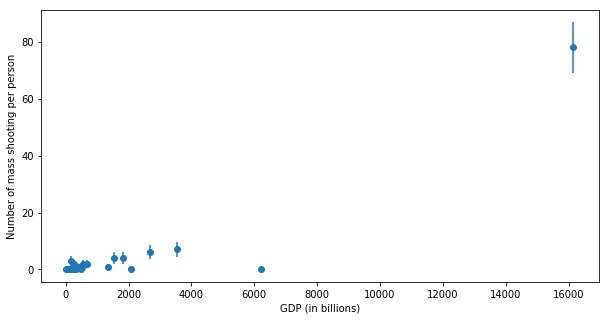

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings

USA datapoint is an outlier.


In [67]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
# Plot mass shooting vs gdp in absolute numbers, and per person
scatter = ax.scatter(df_.GDP / 1e9, df_['Number of mass shootings'])
# Use Poisson statistics for the errorbars on the number of mass shooting
ax.errorbar(df_.GDP / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.') # Show the errorbars (y errors).
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")

print ("\nUSA datapoint is an outlier.") # Are there any points that look like they may be outilers?

In [98]:
# Plot the average number of civilian fire arms per person
df_['armspp'] = df_["Average total all civilian firearms"] / df_['Population'] * 1e3

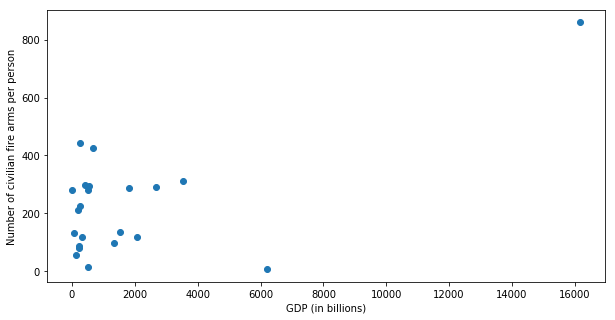

Number of civilian fire arms vs GDP.
The datapoint to the top right of the plot is the USA, which has the both highest GDP and highest # of fire arms per person.


In [100]:
# First without errors
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df_.GDP / 1e9, df_['armspp'])
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of civilian fire arms per person")
ax.set_ylim()
pl.show()
print ("Number of civilian fire arms vs GDP.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has the both highest GDP and highest # of fire arms per person.")

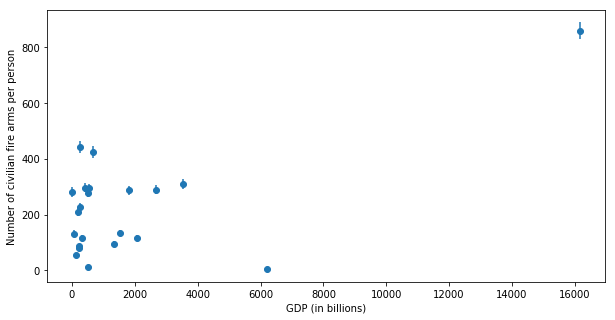

Number of civilian fire arms vs GDP, errors represent Poisson statistics.


In [101]:
# Then with errors
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df_.GDP / 1e9, df_['armspp'])
# Use Poisson statistics for the errorbars on the number of civilian fire arms
ax.errorbar(df_.GDP / 1e9, df_['armspp'], 
            yerr = np.sqrt(df_['armspp'] * 1.0), fmt = '.') # Show the errorbars (y errors).
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of civilian fire arms per person")
ax.set_ylim()
pl.show()
print ("Number of civilian fire arms vs GDP, " +
       "errors represent Poisson statistics.")

In [84]:
# Plot the average number of homicide by fire arms per person
df_['homspp'] = df_['Number of homicides by firearm'] / df_['Population'] * 1000

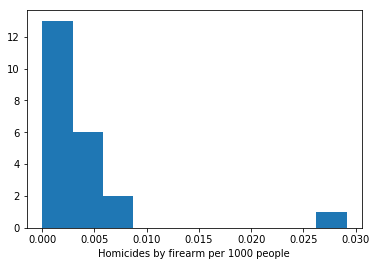

In [86]:
# First as a histogram
fig, ax = plt.subplots()
ax.hist(df_['homspp'])
ax.set_xlabel('Homicides by firearm per 1000 people');

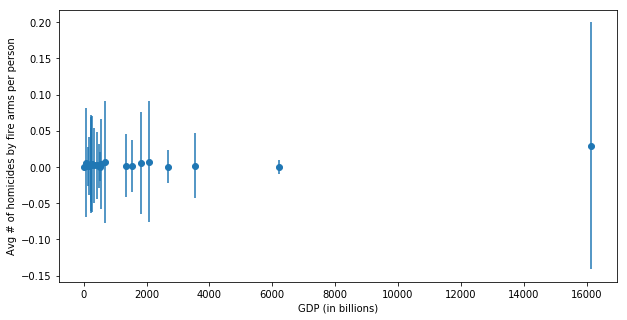

Avg # of homicides by fire arms vs GDP, errors represent Poisson statistics.
The datapoint to the far right of the plot is the USA, which has both the highest GDP
and the highest average number of homicidesby fire arms per person.


In [94]:
# Then against the country GDP, with statistical errors.
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.GDP / 1e9, df_['homspp'])
ax.errorbar(df_.GDP / 1e9, df_['homspp'], 
            yerr = np.sqrt(df_['homspp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Avg # of homicides by fire arms per person")
ax.set_ylim()
pl.show()
print ("Avg # of homicides by fire arms vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the far right of the plot is the USA, " + 
       "which has both the highest GDP\n" + "and the highest average number of homicides" + 
       "by fire arms per person.") # Are there points that look like outliers?

In [ ]:
# Plot the number of homicides by fire arm against the number of civilian firearms.



# plot the US in a different color

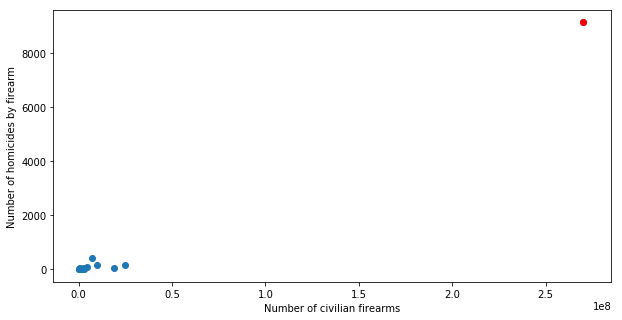

Number of civilian fire arms vs homicides by fire arm.


In [115]:
# First without errors
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'])
ax.set_xlabel("Number of civilian firearms")
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()
# plot the US in a different color
scatter = ax.scatter(df_['Average total all civilian firearms'][-1:], df_['Number of homicides by firearm'][-1:],
                    color='red')
pl.show()
print ("Number of civilian fire arms vs homicides by fire arm.")

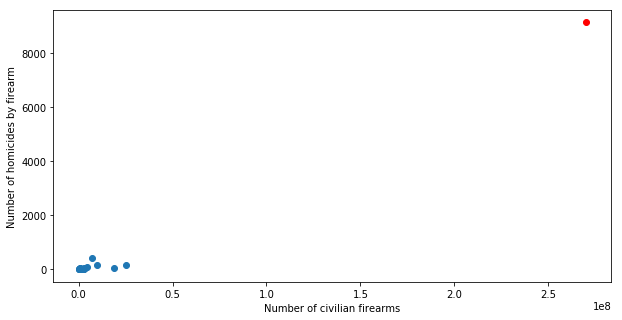

Number of civilian fire arms vs homicides by fire arm.


In [122]:
# Then with errors
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
# plot the US in a different color
scatter = ax.scatter(df_['Average total all civilian firearms'][-1:], df_['Number of homicides by firearm'][-1:],
                    color='red')
scatter = ax.scatter(df_['Average total all civilian firearms'][:-1], df_['Number of homicides by firearm'][:-1])
ax.errorbar(df_['Average total all civilian firearms'][:-1], df_['Number of homicides by firearm'][:-1], 
            yerr = np.sqrt(df_['Number of homicides by firearm'][:-1] * 1.0), fmt = '.')
ax.set_xlabel("Number of civilian firearms")
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()
pl.show()
print ("Number of civilian fire arms vs homicides by fire arm.")

Extra credit: download directly from google docs with a google API

Remember that succesfully fitting a line to data is not sufficient. Comment on what conclusions can be drawn from your analysis (and don't jump to conclusions!)